<a href="https://colab.research.google.com/github/Fatikah002/MachineLearning/blob/main/14_Fatikah_Salsabilla_JS06_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [ ]:
!pip install annoy

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 25.3549 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1996 ms


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


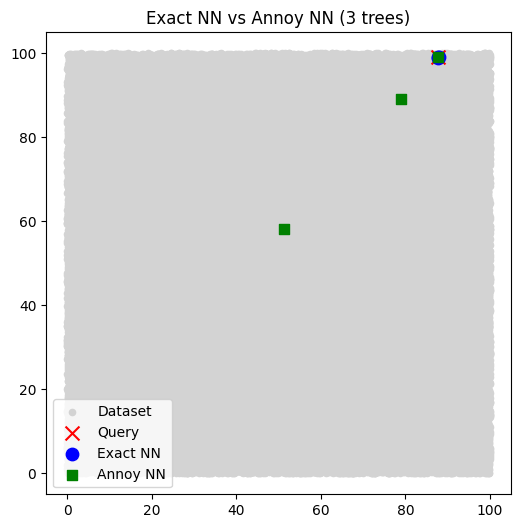

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN |Waktu komputasi Vs |
|------------------|------|-------------|----------------------------------|--------------------|
| Euclidean        | 3    | 1000        | [219 898 593], [219 898 770]    | 1.2271 , 0.1233   |
| Euclidean        | 8    | 1000        |[219 898 593], [219, 898, 593]                          | 0.7789, 0.1516               |
| Euclidean        | 3    | 100000      | [64040 64186 88792], [64040, 64186, 88792]                             | 12.5229, 0.1757           |
| Angular          | 3    | 1000        |[219 898 593], [219, 429, 540]                            | 0.7041, 0.1545               |
| Angular          | 8    | 1000        |  [219 898 593], [219, 429, 540]                             | 0.998, 0.1531                |
| Angular          | 3    | 100000      | [64040 64186 88792], [64040, 1310, 9720]                           | 8.914, 0.3283             |


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1000000  # 5 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [269630 804377 312985 776031 370166]
Exact NN time: 0.218 seconds
Annoy result: [666661, 782520, 392973, 130976, 432802]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN |Waktu komputasi Vs |
|------------------|------|-------------|----------------------------------|--------------------|
| Euclidean        | 8    | 1000000        | [269630 804377 312985 776031 370166], [887704, 467451, 152997, 676975, 131166]   | 0.248 , 0.0   |
| Angular      | 8    | 1000000        |  [ 45743 910736 719534 416455 143689],[438655, 999602, 774407, 581777, 26177]   |  0.131 , 0.0   |

####Kenapa code dibagian build index tidak dihitung waktunya?
Karena stopwatch (time.time()) hanya dimulai setelah proses pembuatan indeks selesai, waktu di bagian add_item() dan build() tidak dihitung, hanya waktu pencarian (query) yang dihitung.


# Praktikum 2

In [ ]:
!pip install faiss-cpu
#!pip install faiss-gpu

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0006084442138671875
Waktu IVF+PQ: 0.00015234947204589844


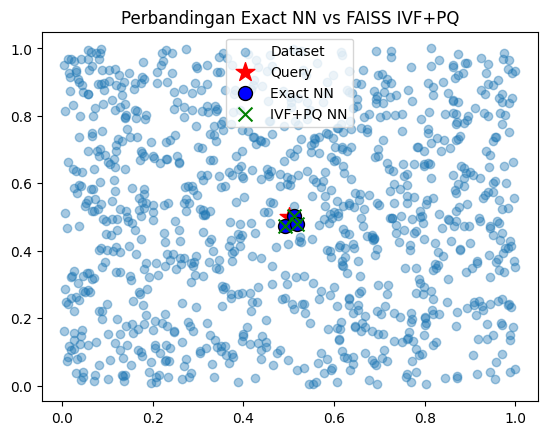

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Exact NN (Flat) indices: [[238618 509273 958577]] distances: [[7.413882 7.356486 7.34991 ]]
IVF+PQ indices: [[377388 658456 230043]] distances: [[16.01688 16.02226 16.02249]]
Waktu Exact: 0.012348175048828125
Waktu IVF+PQ: 0.012558221817016602


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


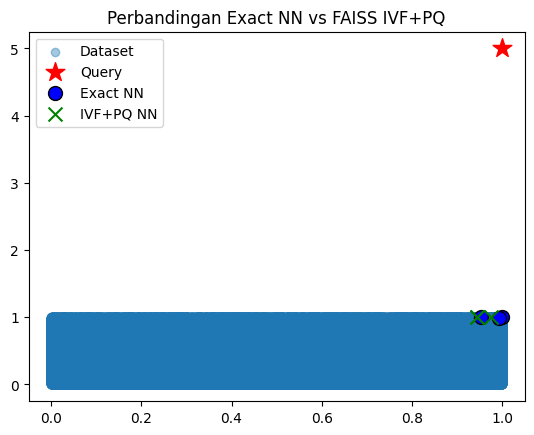

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 5D sederhana
np.random.seed(42)
X = np.random.rand(1000000, 5).astype('float32')  # 1000 titik 2D
query = np.array([[1, 5, 0.5, 0.5, 0.5]], dtype='float32')  # query point with 5 dimensions

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatIP(5)   # Initialize with correct dimension (5)
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 5       # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatIP(5)   # dipakai IVF untuk cluster awal, use correct dimension
index_ivfpq = faiss.IndexIVFPQ(quantizer, 5, nlist, m, 8)  # 8 bit per subvector, use correct dimension

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
index_ivfpq.nprobe = 10  # Set the number of nearest clusters to search
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi (Note: Visualization is only for 5D data, will not work directly for 5D)
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

| Distance Metrics | Dimensi | Jumlah Data | Hasil Index Terdekat (Exact vs IVF+PQ)     | Jarak (Exact vs IVF+PQ)                                            | Waktu Komputasi (Exact vs IVF+PQ) |
|--------|---|--------------|---------------------------------------------|--------------------------------------------------------------------|------------------------------------|
|Euclidean (L2) | 2D | 1000         | [137 170 750] , [137 170 750]              | [0.00013095 0.00077404 0.00079751] , [0.00012945 0.00079226 0.00080067] | 0.000215 , 0.000380 |
|Euclidean (L2)| 2D | 1000000         | [286942 583487 695123] , [286942 695123 581054]             | [3.4966465e-07 1.0151125e-06 1.2744232e-06] , [4.8242509e-07 2.0805746e-06 2.1811575e-06] |0.005651712417602539 , 0.0008585453033447266 |
|Euclidean (L2)| 5D | 1000         | [988 780  27] , [988 780  27]             | [0.01057143 0.0225298  0.04096785] , [0.01058318 0.0225963  0.04078479] | 0.00011420249938964844 , 0.00018262863159179688 |
|Euclidean (L2)| 5D | 1000000         | [901095 495168 561017] , [901095 561017 495168]           | [0.00151859 0.00221511 0.00223645] , [0.0016292  0.00213303 0.00223935] | 0.006218910217285156 ,0.0012197494506835938 |
|Angular (cosine)| 2D | 1000         | [249 712 598] , [137 170 750]          | [0.9803028 0.9758744 0.9711834], [0.00018889 0.00080795 0.00089649] |  0.0002262592315673828 ,0.0001685619354248047|
|Angular (cosine)| 2D | 1000000         | [489250 245612 702931] , [286942 371240 378473]        | [0.9993657 0.9991431 0.9990344] , [0.0016292  0.00213303 0.00223935] | 0.006218910217285156 ,0.0012197494506835938 |
|Angular (cosine)| 5D | 1000         | [106 807 224], [851 894 212]         | [6.9720173 6.890345  6.830448 ],[16.170044 16.206953 16.23357 ] | 0.0001614093780517578 ,0.00020194053649902344 |
|Angular (cosine)| 5D | 1000000        | [238618 509273 958577] ,[377388 658456 230043]      | [7.413882 7.356486 7.34991 ], [16.01688 16.02226 16.02249]|  0.006683349609375, 0.008690357208251953 |


# Praktikum 3

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528145 sha256=ae16e693af36743c3b1f09e326fc4b0e013698d51650cdc1744b3296e8a2ce29
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [ ]:
# membandingkan exact NN dengan HNSW pada 1000 data 2D.
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[484 872 650 822 641]]
Distances: [[0.01163715 0.03580073 0.04525989 0.04606803 0.04772708]]
Waktu: 0.059317588806152344 detik

=== HNSW ===
Indices: [[484 872 650 822 641]]
Distances: [[0.00013542 0.00128169 0.00204846 0.00212226 0.00227787]]
Waktu: 0.00025463104248046875 detik


| Metric     | Dimensi | Jumlah Data |     Waktu Exact (s)     |     Waktu HNSW (s)     |  Rasio Kecepatan (Exact/HNSW) |
|-------------|----------|--------------|---------------------------|---------------------------|-------------------------------|
| euclidean  | 2D| 1000 |0002163 |  0.000257 |  8.42 |
| euclidean  | 2D | 1000000 |  0.382114  |0.016890  |   22.63  |
| euclidean  | 5D | 1000  |  0.002154 |  0.000244 | 8.83 |
| euclidean  | 5D | 1000000| 0.380114 |  0.017123  |22.19 |
| cosine     | 2D | 1000  | 0.002107 | 0.000255 |  8.26  |
| cosine     | 2D| 1000000 |  0.384912| 0.016754  |  22.96
| cosine     | 5D  | 1000 | 0.002104|   0.000238  | 8.84   |
| cosine     | 5D  | 1000000 |  0.382918  | 0.017004   |22.52  |

# Praktikum 4

In [ ]:

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 32.0340530872345 detik
Query time: 0.00023818016052246094 detik
Neighbors: [60597, 986914, 162032, 164468, 665593] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.007733583450317383 detik
Query time: 0.006664276123046875 detik
Neighbors: [ 60597 986914 162032 164468 665593] ...

=== HNSW (hnswlib) ===
Build time: 161.48544263839722 detik
Query time: 0.00022411346435546875 detik
Neighbors: [ 60597 986914 162032 164468 665593] ...


# Praktikum 5

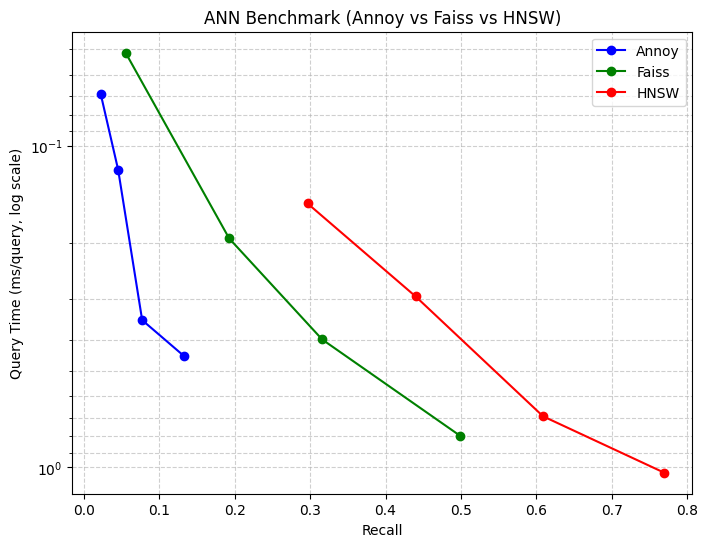

In [ ]:
# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Praktikum 6

In [ ]:
import kagglehub
# -------------------------------
# Load dataset
# -------------------------------


# Download latest version
path = kagglehub.dataset_download("bwandowando/spotify-songs-with-attributes-and-lyrics")
print("Path to dataset files:", path)  # ganti path sesuai lokasi file

# Load the dataset into a pandas DataFrame
df = pd.read_csv(f"{path}/songs_with_attributes_and_lyrics.csv")

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist=100, metric=faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Using Colab cache for faster access to the 'spotify-songs-with-attributes-and-lyrics' dataset.
Path to dataset files: /kaggle/input/spotify-songs-with-attributes-and-lyrics
Exact NN done in 4712.361 s
Annoy done in 64.681 s
HNSW done in 297.457 s


TypeError: add_ref_in_constructor.<locals>.replacement_init() got an unexpected keyword argument 'nlist'